# Dane pomiarowe powietrza w Polsce (źródło gios.gov.pl)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = "http://powietrze.gios.gov.pl/pjp/archives"

## Pyły drobne PM10
jednostka ug/m3:
- poziom dopuszczalny 50 µg/m3 (dobowy)
- poziom informowania 200 µg/m3 (dobowy)
- poziom alarmowy 300 µg/m3 (dobowy)

In [28]:
PM_10 = pd.read_excel('2017_PM10_1g.xlsx')

In [29]:
PM_10.head(10)

,Nr,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,Kod stacji,DsBoleslaMOB,DsDzialoszyn,DsDziePilsud,DsJelGorOgin,DsKlodzSzkol,DsKudowaMOB,DsLegAlRzecz,DsNowRudSreb,DsWalbrzWyso,...,WpBoroDrapal,WpKaliSawick,WpKoniWyszyn,WpPilaKusoci,WpPoznDabrow,WpPoznPolank,ZpKoszArKraj,ZpSzczAndr01,ZpSzczecPrze,ZpSzczLacz04
1,Wskaźnik,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,...,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10,PM10
2,Czas uśredniania,1g,1g,1g,1g,1g,1g,1g,1g,1g,...,1g,1g,1g,1g,1g,1g,1g,1g,1g,1g
3,Jednostka,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,...,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3,ug/m3
4,Kod stanowiska,DsBoleslaMOB-PM10-1g,DsDzialoszyn-PM10-1g,DsDziePilsud-PM10-1g,DsJelGorOgin-PM10-1g,DsKlodzSzkol-PM10-1g,DsKudowaMOB-PM10-1g,DsLegAlRzecz-PM10-1g,DsNowRudSreb-PM10-1g,DsWalbrzWyso-PM10-1g,...,WpBoroDrapal-PM10-1g,WpKaliSawick-PM10-1g,WpKoniWyszyn-PM10-1g,WpPilaKusoci-PM10-1g,WpPoznDabrow-PM10-1g,WpPoznPolank-PM10-1g,ZpKoszArKraj-PM10-1g,ZpSzczAndr01-PM10-1g,ZpSzczecPrze-PM10-1g,ZpSzczLacz04-PM10-1g
5,2017-01-01 01:00:00,NaN,"53,3963","405,0","226,603","289,173",NaN,"80,1625","446,146","467,889",...,"23,4837","61,8409","18,53","62,105","33,2655","47,02","24,221","60,0293","20,2558","24,1928"
6,2017-01-01 02:00:00,NaN,"52,9082","310,984","229,432","265,72",NaN,"38,6769","473,629","144,374",...,"44,2607","117,002","20,0714","114,091","46,4343","62,9012","24,9919","50,9891","17,4999","83,2406"
7,2017-01-01 03:00:00,NaN,"51,3831","455,381","253,827","243,228",NaN,"47,0206","336,169","61,1247",...,"40,7959","32,0493","21,63","19,2682","29,8119","65,17","15,8157","34,6693","8,88873","39,7984"
8,2017-01-01 04:00:00,NaN,"44,6262","290,6","225,692","258,756",NaN,"31,2669","285,767","65,8004",...,"19,5365","31,6062","23,7979","13,1749","30,7476","65,17","9,87341","28,0312","7,46767","30,2386"
9,2017-01-01 05:00:00,NaN,"41,5999","263,553","254,761","242,493",NaN,"53,598","270,204","59,9626",...,"23,4659","26,8417","25,99","14,5591","31,2552","58,6162","13,6186","28,9273","8,14248","28,8418"


In [30]:
PM_10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Columns: 124 entries, Nr to 123
dtypes: object(124)
memory usage: 8.3+ MB


In [31]:
PM_10 = PM_10.drop([1,2,3,4], axis = 0)

In [32]:
PM_10.columns = PM_10.iloc[0]

In [33]:
PM_10 = PM_10.drop([0], axis = 0)

In [34]:
PM_10['Kod stacji'] = pd.to_datetime(PM_10['Kod stacji']) 

In [35]:
PM_10 = PM_10.set_index("Kod stacji")

In [48]:
PM_10 = PM_10.apply(lambda x: x.str.replace(',','.'))

### Mazowsze

In [64]:
PM_10_Mazowsze_2017 = PM_10[PM_10.columns[PM_10.columns.to_series().str.contains('Mz')]]
PM_10_Mazowsze_2017 = PM_10_Mazowsze_2017.apply(lambda x: pd.to_numeric(x))
PM_10_Mazowsze_2017.head(4)

,MzKonJezMos,MzOtwoBrzozo,MzPlocMiReja,MzRadTochter,MzSiedKonars,MzWarAlNiepo,MzWarKondrat,MzWarMarszal,MzWarWokalna,MzZyraRoosev
Kod stacji,,,,,,,,,,
2017-01-01 01:00:00,NaN,85.668425,49.591231,64.409760,76.029523,70.912369,92.187643,68.360580,84.86,53.302091
2017-01-01 02:00:00,NaN,67.278460,39.695604,51.196126,61.187774,49.313293,92.698443,51.956218,46.62,49.591231
2017-01-01 03:00:00,NaN,58.773100,39.695604,52.146126,61.281709,45.394474,57.351083,44.027444,43.87,47.117324
2017-01-01 04:00:00,NaN,34.329771,39.695604,50.159763,57.524304,42.387007,46.522123,42.113601,43.46,53.302091


In [106]:
PM_10_Mazowsze_2017.columns = ['Konstancin-Jeziorna', 'Otwock', 'Plock', 'Radom', 'Siedlece', 'Warszawa Niepodleglosci', 'Warszawa Kondratowicza', 'Warszawa Marszałkowska', 'Warszawa Wokalna', 'Żyrardów']

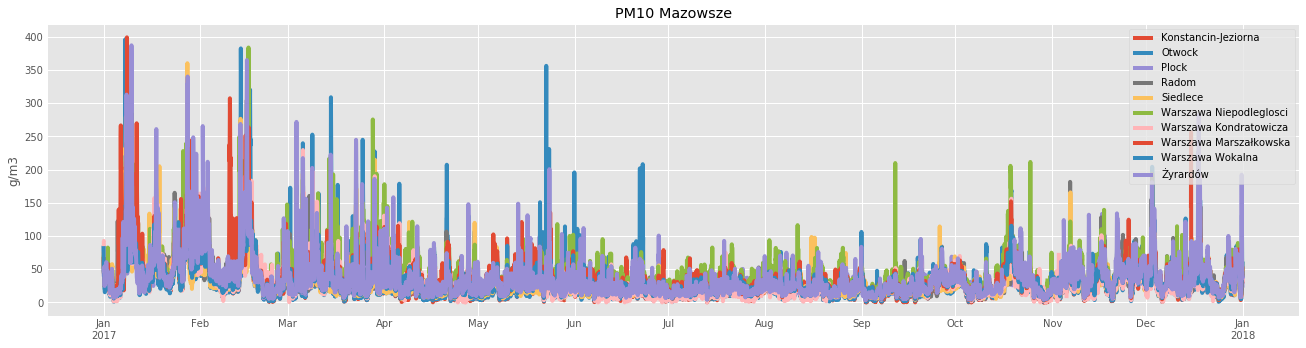

In [116]:
plt.style.use('ggplot')
ax = PM_10_Mazowsze_2017.plot(figsize=(20,5))
ax.set_title("PM10 Mazowsze")
ax.set_xlabel("")
ax.set_ylabel("g/m3")
ax.legend(loc = 'upper right')
plt.show()

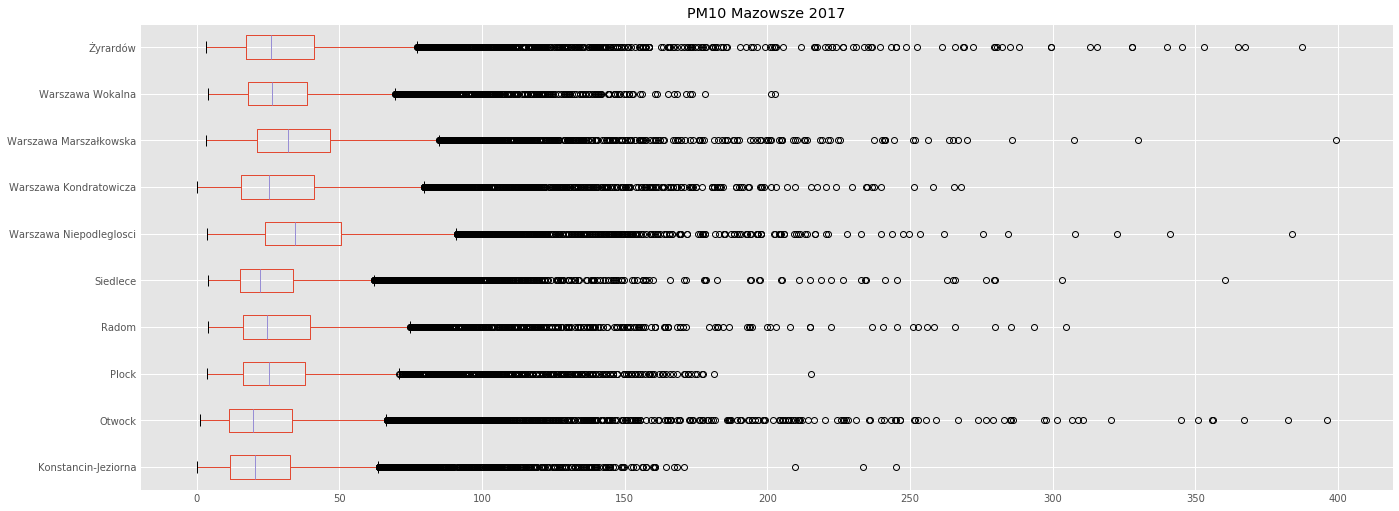

In [117]:
ax = PM_10_Mazowsze_2017.boxplot(figsize=(20,8), vert = False)
ax.set_title("PM10 Mazowsze 2017")
plt.show()

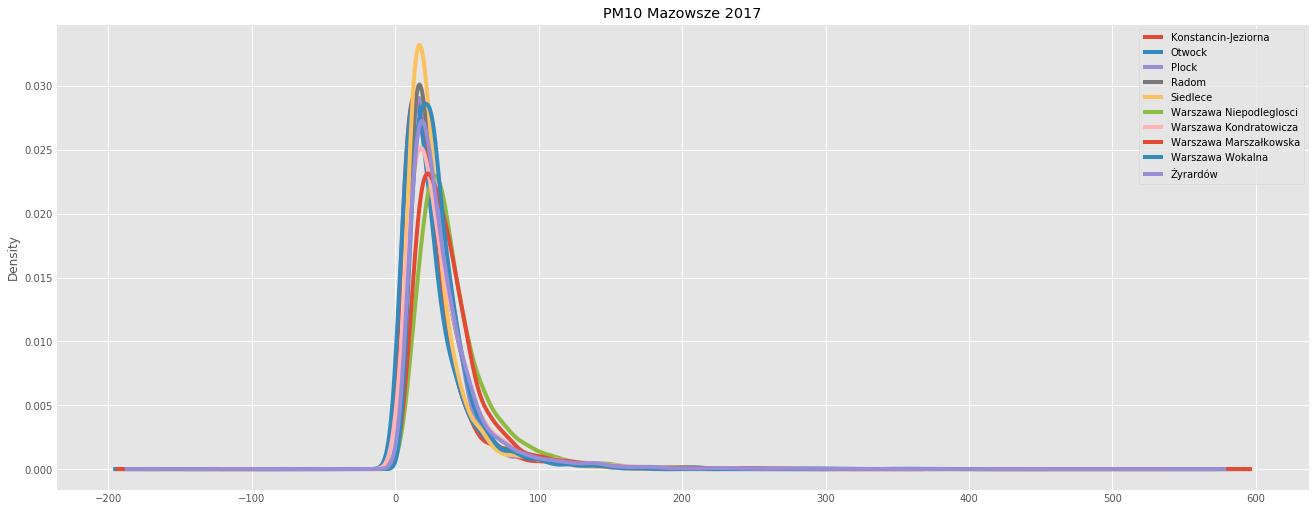

In [119]:
ax = PM_10_Mazowsze_2017.plot(kind = 'density', figsize=(20,8))
ax.set_title("PM10 Mazowsze 2017")
plt.show()

In [ ]:
Warszawa

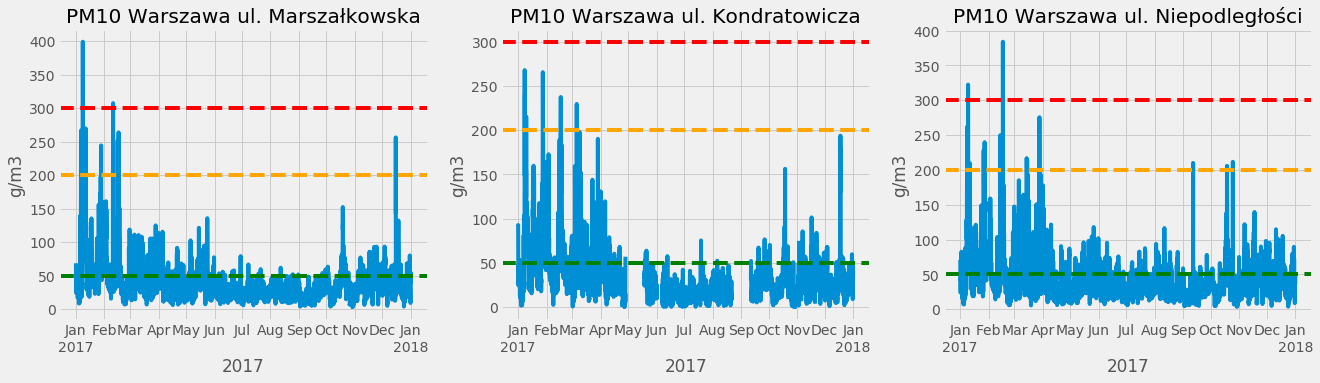

In [130]:
plt.style.use('fivethirtyeight')
plt.subplot(1,3,1)
ax = PM_10_Mazowsze_2017['Warszawa Marszałkowska'].plot(figsize=(20,5))
ax.set_title("PM10 Warszawa ul. Marszałkowska")
ax.axhline(300, color = 'red', linestyle='--')
ax.axhline(200, color = 'orange', linestyle='--')
ax.axhline(50, color = 'green', linestyle='--')
ax.set_xlabel("2017")
ax.set_ylabel("g/m3")

plt.subplot(1,3,2)
ax = PM_10_Mazowsze_2017['Warszawa Kondratowicza'].plot()
ax.set_title("PM10 Warszawa ul. Kondratowicza")
ax.axhline(300, color = 'red', linestyle='--')
ax.axhline(200, color = 'orange', linestyle='--')
ax.axhline(50, color = 'green', linestyle='--')
ax.set_xlabel("2017")
ax.set_ylabel("g/m3")

plt.subplot(1,3,3)
ax = PM_10_Mazowsze_2017['Warszawa Niepodleglosci'].plot()
ax.set_title("PM10 Warszawa ul. Niepodległości")
ax.axhline(300, color = 'red', linestyle='--')
ax.axhline(200, color = 'orange', linestyle='--')
ax.axhline(50, color = 'green', linestyle='--')
ax.set_xlabel("2017")
ax.set_ylabel("g/m3")

plt.show()

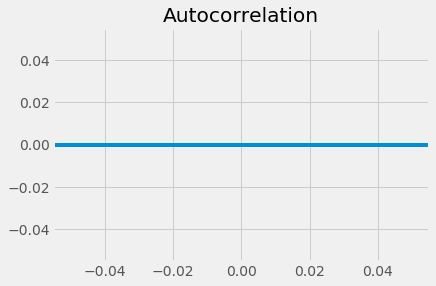

In [137]:
# Autokorelacja
from statsmodels.graphics import tsaplots
fig = tsaplots.plot_acf(PM_10_Mazowsze_2017['Warszawa Marszałkowska'], lags=24)


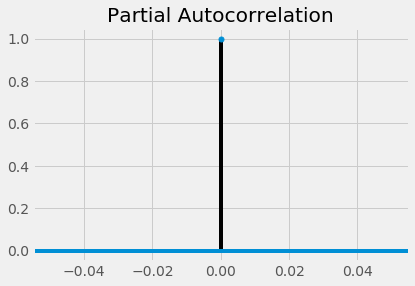

In [133]:
# Partial autocorelation
fig = tsaplots.plot_pacf(PM_10_Mazowsze_2017['Warszawa Marszałkowska'], lags=24)


In [143]:
PM_10_Mazowsze_2017.isnull().sum()

Konstancin-Jeziorna         681
Otwock                      270
Plock                        38
Radom                       273
Siedlece                    236
Warszawa Niepodleglosci      62
Warszawa Kondratowicza     1298
Warszawa Marszałkowska      169
Warszawa Wokalna            189
Żyrardów                    271
dtype: int64

In [144]:
# ffill = last valid observation
PM_10_Mazowsze_2017 = PM_10_Mazowsze_2017.fillna(method = 'ffill') 

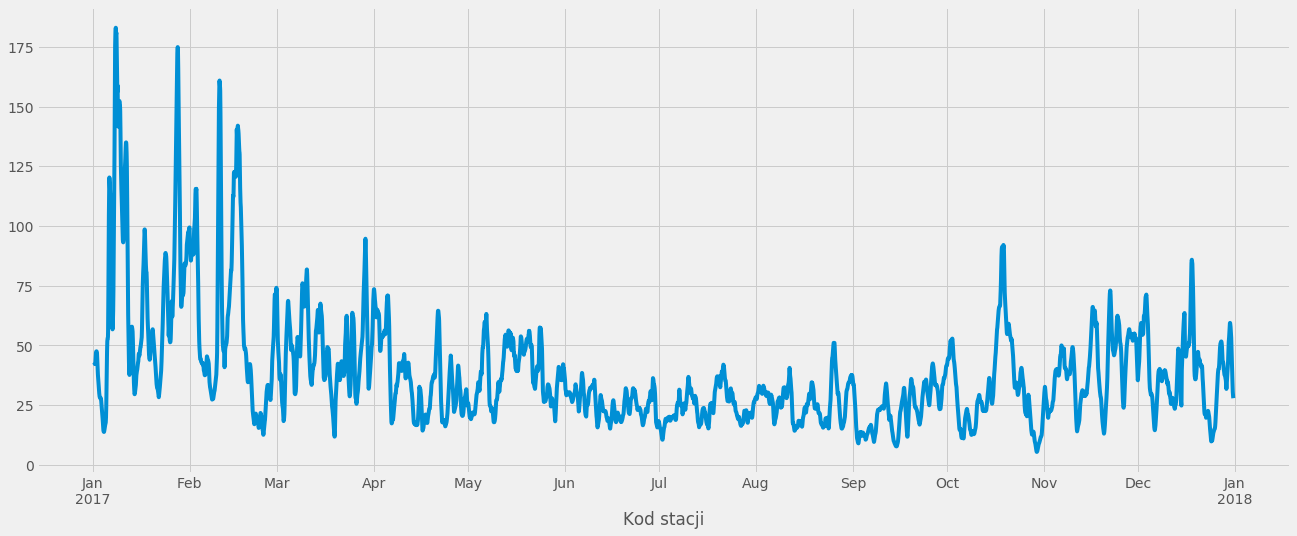

In [149]:
# decomposition
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(PM_10_Mazowsze_2017['Warszawa Marszałkowska'])
decomposition.trend.plot(figsize=(20,8))
plt.show()